# Waze Review Sentiment Analysis

I will be performing an App Review Sentiment Analysis on the Waze mobile app dataset so as to evaluate and understand the sentiments expressed in user reviews over a 15 year span; 2009 through 2023.</b> 

I will use data analysis techniques to determine whether the sentiments in these reviews are positive, negative, or neutral.</b>

I will also perform Exploratory Data Analysis on the dataset to answer a few questions derived along the way.</b>

In [1]:
# import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline 

In [2]:
# Load the dataset
df = pd.read_csv('WAZE_REVIEWS.csv')
df

,Unnamed: 0,review_id,pseudo_author_id,author_name,review_text,review_rating,review_likes,author_app_version,review_timestamp
0,0,6caba53d-789d-4733-bad5-c7491daf80f2,152618553977019693742,A Google user,Nice app need to add red light cam.,5,0,0.99.2.3,2009-06-30 16:48:15
1,1,30c15838-8b02-4dae-8f51-25905cb40b68,234382942865437071667,A Google user,Really cool social app. Lots of potential to b...,5,0,0.99.2.3,2009-06-30 16:58:43
2,2,c090400e-f88f-4129-930d-a650f3163a11,174473604608358796368,A Google user,I was all excited about this app (ehat a great...,1,0,0.99.2.3,2009-06-30 17:08:33
3,3,f6f37456-793b-4786-af6e-454a811361bf,286593453219054880269,A Google user,I love this app! Lol,5,0,0.99.2.3,2009-06-30 17:37:22
4,4,8ae5d962-7c0c-476d-82fa-79f6e5484acc,167276875678680630145,A Google user,Great app i like the idea of your car being pa...,4,0,0.99.2.3,2009-06-30 23:58:43
...,...,...,...,...,...,...,...,...,...
780068,780068,01655504-5a51-4c19-b313-2bd5fa3f253a,680743620884748258838,Ma********ll,Freezes,3,0,NaN,2023-11-17 03:18:26
780069,780069,f04306cb-af60-4a44-aebc-c37122620319,266638684561117704682,Zu******el,To stuck,1,0,NaN,2023-11-17 03:18:38
780070,780070,894e3c41-ca20-4781-9308-70eeb060a865,154572309081670894420,br**********ji,racist made app,1,0,4.99.0.2,2023-11-17 03:23:20
780071,780071,4fafb0b1-485e-473e-9bcd-d5c9848424d2,154995071911163107981,Mo***********da,بهترین مثل همیشه.با آی پی ثابت های کانال تلگرا...,5,0,4.99.1.1,2023-11-17 04:05:02


In [3]:
# lets take a look at 5 random rows
df.sample(5)

,Unnamed: 0,review_id,pseudo_author_id,author_name,review_text,review_rating,review_likes,author_app_version,review_timestamp
632389,632389,2108a2cf-eb26-4f7d-a670-03183aff02f5,307567210274246798184,A Google user,Idiot,1,0,4.49.0.3,2019-03-22 11:16:14
296940,296940,8edf0d20-e85b-46fb-832c-7d6ceddcbfd3,247845047902309636948,A Google user,"Love it. Just sometimes it hangs, and i gotta ...",5,0,3.9.5.4,2015-09-07 23:53:44
399229,399229,8ee48734-c270-4daa-a395-dea512da8974,263037574019862509218,A Google user,Waze. don't leave home without it,5,0,4.3.0.2,2016-06-11 20:04:03
455651,455651,26aed044-4525-4cc7-88a2-6c89f1d45c66,303128021550759344001,A Google user,I used this app for an 1800 mile drive across ...,5,1,4.15.0.2,2016-12-03 09:33:37
633718,633718,66b821fb-7a72-4103-ae27-671e5599e278,164303889347651644861,A Google user,awesome app,5,0,4.49.0.3,2019-04-02 20:46:13


In [4]:
# lets take a look at the columns
df.columns

Index(['Unnamed: 0', 'review_id', 'pseudo_author_id', 'author_name',
       'review_text', 'review_rating', 'review_likes', 'author_app_version',
       'review_timestamp'],
      dtype='object')

In [5]:
# we only need a few key columns so we will create a subset
waze_data = df[['review_text', 'review_rating','author_app_version',
       'review_timestamp' ]]
waze_data

,review_text,review_rating,author_app_version,review_timestamp
0,Nice app need to add red light cam.,5,0.99.2.3,2009-06-30 16:48:15
1,Really cool social app. Lots of potential to b...,5,0.99.2.3,2009-06-30 16:58:43
2,I was all excited about this app (ehat a great...,1,0.99.2.3,2009-06-30 17:08:33
3,I love this app! Lol,5,0.99.2.3,2009-06-30 17:37:22
4,Great app i like the idea of your car being pa...,4,0.99.2.3,2009-06-30 23:58:43
...,...,...,...,...
780068,Freezes,3,NaN,2023-11-17 03:18:26
780069,To stuck,1,NaN,2023-11-17 03:18:38
780070,racist made app,1,4.99.0.2,2023-11-17 03:23:20
780071,بهترین مثل همیشه.با آی پی ثابت های کانال تلگرا...,5,4.99.1.1,2023-11-17 04:05:02


In [6]:
# lets take a look at the datatypes as well as check for any null values
waze_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780073 entries, 0 to 780072
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   review_text         775559 non-null  object
 1   review_rating       780073 non-null  int64 
 2   author_app_version  696472 non-null  object
 3   review_timestamp    780073 non-null  object
dtypes: int64(1), object(3)
memory usage: 23.8+ MB


### As you can see, we have null values in review_text and author_app_version columns.

In [7]:
# lets take a look at each review rating
waze_data['review_rating'].value_counts()

5    523774
4    125025
1     70576
3     37574
2     23109
0        15
Name: review_rating, dtype: int64

In [8]:
# we need to remove the 0 rating, lets first find them all
waze_data.loc[waze_data['review_rating'] == 0]

,review_text,review_rating,author_app_version,review_timestamp
1304,Severely laggy and also freezes up my phone of...,0,2.4.0.26,2010-12-20 10:51:26
1322,"Great app, I prefer it than all others,",0,2.4.0.26,2010-12-24 09:49:52
1337,1ST TIME!,0,2.0.3.0,2010-12-25 23:16:40
1347,It will be a great app once the qord gets out ...,0,2.2.0.0,2010-12-27 22:35:58
1351,i cant it!!,0,2.0.3.0,2010-12-28 08:03:54
1363,It sucks don't kept you info when you log back...,0,2.0.3.0,2010-12-29 18:28:14
1372,I love this program. It is easy and simple to ...,0,2.3.5.1,2010-12-31 03:59:21
1393,I like the ease to use.,0,2.2.0.0,2011-01-03 00:58:10
1416,Need more improvement on sabah map,0,2.3.5.1,2011-01-08 15:18:24
1481,M loving this :),0,2.0.3.0,2011-01-23 14:52:44


In [9]:
# lets now find the ratings that are not equal to 0, then save to dataset
waze_data = waze_data.loc[waze_data['review_rating'] != 0]
waze_data

,review_text,review_rating,author_app_version,review_timestamp
0,Nice app need to add red light cam.,5,0.99.2.3,2009-06-30 16:48:15
1,Really cool social app. Lots of potential to b...,5,0.99.2.3,2009-06-30 16:58:43
2,I was all excited about this app (ehat a great...,1,0.99.2.3,2009-06-30 17:08:33
3,I love this app! Lol,5,0.99.2.3,2009-06-30 17:37:22
4,Great app i like the idea of your car being pa...,4,0.99.2.3,2009-06-30 23:58:43
...,...,...,...,...
780068,Freezes,3,NaN,2023-11-17 03:18:26
780069,To stuck,1,NaN,2023-11-17 03:18:38
780070,racist made app,1,4.99.0.2,2023-11-17 03:23:20
780071,بهترین مثل همیشه.با آی پی ثابت های کانال تلگرا...,5,4.99.1.1,2023-11-17 04:05:02


In [10]:
# lets take a look at how many rows we now have
waze_data.shape

(780058, 4)

In [11]:
# lets now verify the review ratings
waze_data['review_rating'].value_counts()

5    523774
4    125025
1     70576
3     37574
2     23109
Name: review_rating, dtype: int64

In [12]:
# lets now remove the null values from column review_text
waze_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 780058 entries, 0 to 780072
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   review_text         775544 non-null  object
 1   review_rating       780058 non-null  int64 
 2   author_app_version  696457 non-null  object
 3   review_timestamp    780058 non-null  object
dtypes: int64(1), object(3)
memory usage: 29.8+ MB


In [13]:
# lets see how many null values there are
waze_data['review_text'].isnull().value_counts()

False    775544
True       4514
Name: review_text, dtype: int64

In [14]:
# lets show all the rows where review_text is null
waze_data[waze_data['review_text'].isnull()]

,review_text,review_rating,author_app_version,review_timestamp
3517,NaN,5,2.4.0.1,2011-08-15 19:07:14
64133,NaN,4,3.7.2.0,2013-06-29 08:18:36
119143,NaN,5,3.7.7.0,2014-02-03 19:12:22
119148,NaN,5,3.7.7.0,2014-02-03 19:57:37
119149,NaN,1,3.7.7.0,2014-02-03 20:14:24
...,...,...,...,...
728625,NaN,1,4.73.0.3,2021-05-20 13:36:57
729919,NaN,1,4.73.0.3,2021-05-22 07:26:47
746168,NaN,4,4.79.0.2,2021-12-01 09:08:16
777429,NaN,4,4.93.1.0,2023-09-27 19:45:10


In [15]:
# lets now see the rows without null values and save to dataset
waze_data = waze_data[ ~waze_data['review_text'].isnull()]
waze_data

,review_text,review_rating,author_app_version,review_timestamp
0,Nice app need to add red light cam.,5,0.99.2.3,2009-06-30 16:48:15
1,Really cool social app. Lots of potential to b...,5,0.99.2.3,2009-06-30 16:58:43
2,I was all excited about this app (ehat a great...,1,0.99.2.3,2009-06-30 17:08:33
3,I love this app! Lol,5,0.99.2.3,2009-06-30 17:37:22
4,Great app i like the idea of your car being pa...,4,0.99.2.3,2009-06-30 23:58:43
...,...,...,...,...
780068,Freezes,3,NaN,2023-11-17 03:18:26
780069,To stuck,1,NaN,2023-11-17 03:18:38
780070,racist made app,1,4.99.0.2,2023-11-17 03:23:20
780071,بهترین مثل همیشه.با آی پی ثابت های کانال تلگرا...,5,4.99.1.1,2023-11-17 04:05:02


In [16]:
# the null values in review_text column have been removed
waze_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 775544 entries, 0 to 780072
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   review_text         775544 non-null  object
 1   review_rating       775544 non-null  int64 
 2   author_app_version  692138 non-null  object
 3   review_timestamp    775544 non-null  object
dtypes: int64(1), object(3)
memory usage: 29.6+ MB


In [17]:
# lets now see how many null values there are in column author_app_version
waze_data['author_app_version'].isnull().value_counts()

False    692138
True      83406
Name: author_app_version, dtype: int64

In [18]:
# lets show all the rows where author_app_version is null
waze_data[waze_data['author_app_version'].isnull()]

,review_text,review_rating,author_app_version,review_timestamp
4762,This app is great. Gives different direction r...,4,NaN,2011-10-19 17:41:09
4778,Me a servido mucho para evitar atochamientos.,5,NaN,2011-10-20 22:14:19
4788,excellent app to knife about the Traffic,4,NaN,2011-10-21 12:11:59
4820,I am literally helpless and lost without this app,5,NaN,2011-10-23 13:33:20
4838,"Fantastic application, works well, can talk an...",5,NaN,2011-10-24 19:29:50
...,...,...,...,...
780047,Good,5,NaN,2023-11-16 14:37:34
780055,"Love it but, Why mine do not show the police? ...",4,NaN,2023-11-16 19:20:06
780064,Good,5,NaN,2023-11-17 00:12:11
780068,Freezes,3,NaN,2023-11-17 03:18:26


In [19]:
# lets now see the rows without null values and save to dataset
waze_clean = waze_data[ ~waze_data['author_app_version'].isnull()].copy()
waze_clean

,review_text,review_rating,author_app_version,review_timestamp
0,Nice app need to add red light cam.,5,0.99.2.3,2009-06-30 16:48:15
1,Really cool social app. Lots of potential to b...,5,0.99.2.3,2009-06-30 16:58:43
2,I was all excited about this app (ehat a great...,1,0.99.2.3,2009-06-30 17:08:33
3,I love this app! Lol,5,0.99.2.3,2009-06-30 17:37:22
4,Great app i like the idea of your car being pa...,4,0.99.2.3,2009-06-30 23:58:43
...,...,...,...,...
780066,PAW patrol,5,4.99.1.1,2023-11-17 02:16:38
780067,"I used to love Waze, but ever since they remov...",2,4.99.0.2,2023-11-17 02:17:06
780070,racist made app,1,4.99.0.2,2023-11-17 03:23:20
780071,بهترین مثل همیشه.با آی پی ثابت های کانال تلگرا...,5,4.99.1.1,2023-11-17 04:05:02


In [20]:
# the null values in author_app_version column have been removed
waze_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 692138 entries, 0 to 780072
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   review_text         692138 non-null  object
 1   review_rating       692138 non-null  int64 
 2   author_app_version  692138 non-null  object
 3   review_timestamp    692138 non-null  object
dtypes: int64(1), object(3)
memory usage: 26.4+ MB


In [21]:
# lets take a look at how many rows we now have
waze_clean.shape

(692138, 4)

### We need to create a year column, but first we have to change dataype of column review_timestamp to datetime64.

In [22]:
waze_clean['review_timestamp'] = pd.to_datetime(waze_clean['review_timestamp'])

In [23]:
# The datatype has now been changed
waze_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 692138 entries, 0 to 780072
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   review_text         692138 non-null  object        
 1   review_rating       692138 non-null  int64         
 2   author_app_version  692138 non-null  object        
 3   review_timestamp    692138 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 26.4+ MB


In [24]:
# lets add a column called review_year which shows the year of each review
waze_clean['review_year'] = waze_clean['review_timestamp'].dt.year

In [25]:
# the column has been added
waze_clean.head(5)

,review_text,review_rating,author_app_version,review_timestamp,review_year
0,Nice app need to add red light cam.,5,0.99.2.3,2009-06-30 16:48:15,2009
1,Really cool social app. Lots of potential to b...,5,0.99.2.3,2009-06-30 16:58:43,2009
2,I was all excited about this app (ehat a great...,1,0.99.2.3,2009-06-30 17:08:33,2009
3,I love this app! Lol,5,0.99.2.3,2009-06-30 17:37:22,2009
4,Great app i like the idea of your car being pa...,4,0.99.2.3,2009-06-30 23:58:43,2009


In [26]:
# lets now take a look at the distribution of user ratings
waze_clean['review_rating'].value_counts()

5    466125
4    114208
1     57702
3     33630
2     20473
Name: review_rating, dtype: int64

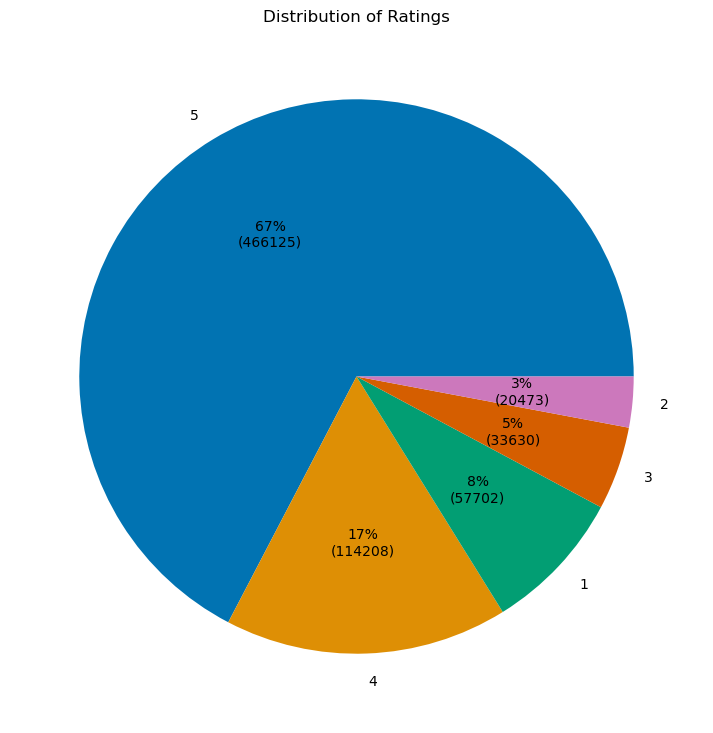

In [27]:
# lets see a distribution of all the ratings
import matplotlib.pyplot as plt 
import seaborn

ratings_distribution = waze_clean['review_rating'].value_counts()
values = waze_clean['review_rating']
numbers = ratings_distribution.index
quantity = ratings_distribution.values
total = len(values)
labels = [5,4,1,3,2]

# Create a custom formatting function showing both % and numeric value
def my_fmt(x):
    return '{:.0f}%\n({:.0f})'.format(x, total * x / 100)

# define Seaborn color palette to use 
palette_color = seaborn.color_palette('colorblind') 
  
# plotting data on chart 
plt.figure(figsize=(9,9))
plt.pie(ratings_distribution, labels=numbers, colors=palette_color,autopct=my_fmt) 
plt.title('Distribution of Ratings')
  
# displaying chart 
plt.show() 

### As you can see, the above distribution of ratings chart gives us a clear picture of how many reviews fall into each rating category (from 1 to 5)

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #1:</h1>
<b>From the distribution of ratings chart, which rating has the most reviews? Least reviews? </b>
</div>

- Rating number 5 has 466,125 reviews which makes up 67% of all the reviews.
- Rating number 2 has 20,473 reviews which makes up only 3% of all the reviews.

In [28]:
# Lets create sentiment labels for each review, classified as Positive, Negative, or Neutral
from textblob import TextBlob

def textblob_sentiment_analysis(review_text):
    # Analyzing the sentiment of the review
    sentiment = TextBlob(review_text).sentiment
    # Classifying based on polarity
    if sentiment.polarity > 0.1:
        return 'Positive'
    elif sentiment.polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Applying TextBlob sentiment analysis to the reviews and creating new column
waze_clean['Sentiment'] = waze_clean['review_text'].apply(textblob_sentiment_analysis)

# Displaying the first few rows with the sentiment
waze_clean.head(5)

,review_text,review_rating,author_app_version,review_timestamp,review_year,Sentiment
0,Nice app need to add red light cam.,5,0.99.2.3,2009-06-30 16:48:15,2009,Positive
1,Really cool social app. Lots of potential to b...,5,0.99.2.3,2009-06-30 16:58:43,2009,Positive
2,I was all excited about this app (ehat a great...,1,0.99.2.3,2009-06-30 17:08:33,2009,Positive
3,I love this app! Lol,5,0.99.2.3,2009-06-30 17:37:22,2009,Positive
4,Great app i like the idea of your car being pa...,4,0.99.2.3,2009-06-30 23:58:43,2009,Positive


## Analyzing App Reviews Sentiments

Now that our dataset is labelled, let’s perform app reviews sentiment analysis. 

We’ll begin by analyzing the distribution of sentiments across the dataset. It will give us a basic understanding of the general sentiment tendency in the reviews:

In [29]:
# lets take a look at the distribution of sentiments
waze_clean['Sentiment'].value_counts()

Positive    472194
Neutral     181093
Negative     38851
Name: Sentiment, dtype: int64

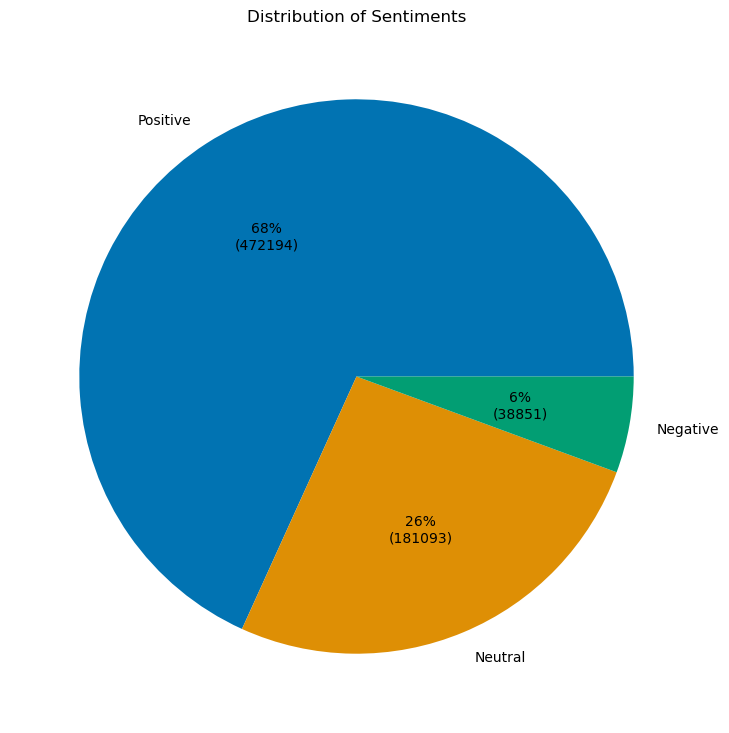

In [30]:
# lets see a distribution of user sentiments
import matplotlib.pyplot as plt 
import seaborn

sentiment_distribution = waze_clean['Sentiment'].value_counts()
values = waze_clean['Sentiment']
numbers = sentiment_distribution.index
quantity = sentiment_distribution.values
total = len(values)

# a custom formatting function showing both % and numeric value
def my_fmt(x):
    return '{:.0f}%\n({:.0f})'.format(x, total * x / 100)

# define Seaborn color palette to use 
palette_color = seaborn.color_palette('colorblind') 
  
# plotting data on chart 
plt.figure(figsize=(9,9))
plt.pie(sentiment_distribution, labels=numbers, colors=palette_color,autopct=my_fmt) 
plt.title('Distribution of Sentiments')
  
# displaying chart 
plt.show() 

### In addition to the app having high ratings, reviewers also had many positive words in the reviews for the app.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #2: </h1>
<b>From the distribution of sentiments chart, what are the total number of reviews from each sentiment? </b>
</div>

- The positive sentiment has a total of 472,194 reviews which equates to 68% of all reviews.</b>
- The neutral sentiment has a total of 181,093 reviews which equates to 26% of all reviews.</b>
- The negative sentiment has a total of 38,851 reviews which equates to 6% of all reviews.</b>

### Next, we’ll explore the relationship between the sentiments and the ratings. This analysis can help us understand whether there is a correlation between the sentiment of the text and the numerical rating. 

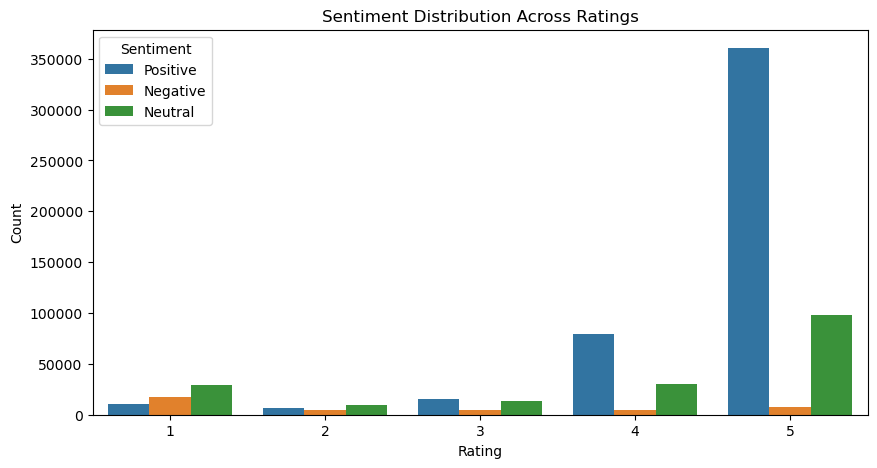

In [31]:
# lets take a look at the distribution of sentiments across the ratings
plt.figure(figsize=(10, 5))
sns.countplot(data=waze_clean, x='review_rating', hue='Sentiment')
plt.title('Sentiment Distribution Across Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

### As you can see, most of the positive reviews fall within rating number 5 and most of the negative reviews fall within rating number 1.  So there is a correlation between the sentiment of the text and the numerical rating.

In [32]:
# lets see how many user reviews make up rating number 1 
waze_rone = waze_clean[ waze_clean['review_rating']== 1].copy()
waze_rone

,review_text,review_rating,author_app_version,review_timestamp,review_year,Sentiment
2,I was all excited about this app (ehat a great...,1,0.99.2.3,2009-06-30 17:08:33,2009,Positive
10,Can't find any address I input,1,0.99.2.3,2009-07-07 03:00:41,2009,Neutral
27,Do not download will fill phone with hundreds ...,1,0.99.2.7,2009-07-19 17:40:47,2009,Negative
57,Same issues as others. Sounds like a great app...,1,1.1.2,2009-08-14 19:37:05,2009,Positive
61,Cant do broad searches like (Gas station miami...,1,0.99.2.7,2009-08-25 02:50:45,2009,Negative
...,...,...,...,...,...,...
780052,The worst apps 👎,1,4.66.0.1,2023-11-16 16:57:41,2023,Negative
780059,Keeps reconnecting no help from Waze emails. A...,1,4.99.1.1,2023-11-16 21:08:41,2023,Neutral
780061,Loses signal often,1,4.99.0.2,2023-11-16 21:14:34,2023,Negative
780062,Update: car icon is gone in AA. Lose my place ...,1,4.99.1.1,2023-11-16 21:23:09,2023,Negative


In [33]:
# Lets now see the number of user reviews rated number 1 and categorized as negative
rone_neg = waze_rone[ waze_rone['Sentiment']=='Negative'].copy()
rone_neg

,review_text,review_rating,author_app_version,review_timestamp,review_year,Sentiment
27,Do not download will fill phone with hundreds ...,1,0.99.2.7,2009-07-19 17:40:47,2009,Negative
61,Cant do broad searches like (Gas station miami...,1,0.99.2.7,2009-08-25 02:50:45,2009,Negative
71,Crap.. doesent work,1,1.2.0,2009-09-11 15:40:04,2009,Negative
110,Slow and buggy,1,1.3.0,2009-10-18 19:06:31,2009,Negative
114,Dumb app. Uninstalling. Dont waste your time.,1,1.3.1,2009-10-19 14:42:59,2009,Negative
...,...,...,...,...,...,...
780031,give the wrong direction which is can can't go...,1,4.96.1.0,2023-11-16 04:02:32,2023,Negative
780037,Always Give wrong location,1,4.73.0.3,2023-11-16 07:01:38,2023,Negative
780052,The worst apps 👎,1,4.66.0.1,2023-11-16 16:57:41,2023,Negative
780061,Loses signal often,1,4.99.0.2,2023-11-16 21:14:34,2023,Negative


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #3: </h1>
<b>Based off the findings from the sentiment distribution across ratings chart, the negative sentiment is at its highest in rating number 1. How many reviews make up this sentiment?</b>
</div>

There are a total of 17,758 reviews which make up the negative sentiment in rating number 1(this makes up 46% out of all  negative sentiments).

### Let’s perform a text analysis to identify common words or themes within each sentiment category. This involves examining the most frequently occurring words in positive, negative, and neutral reviews using a word cloud.

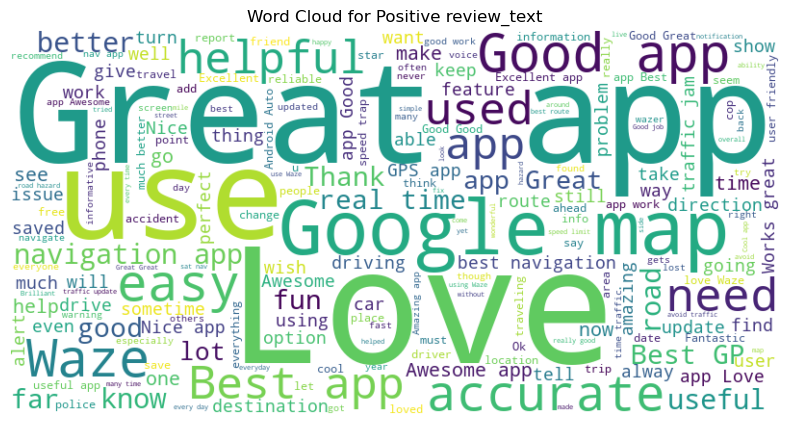

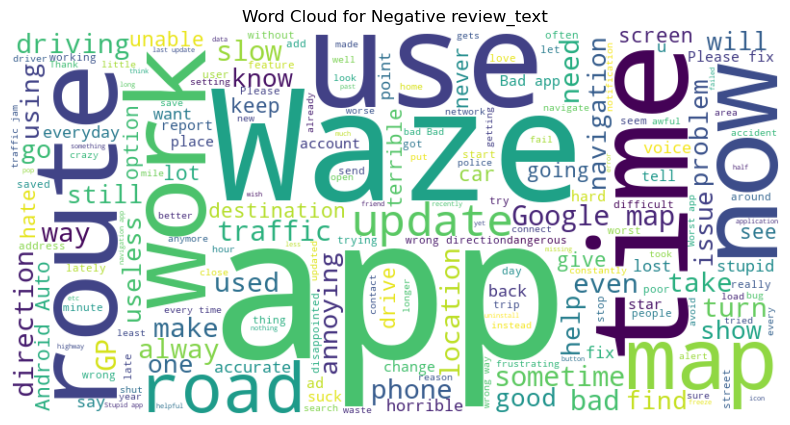

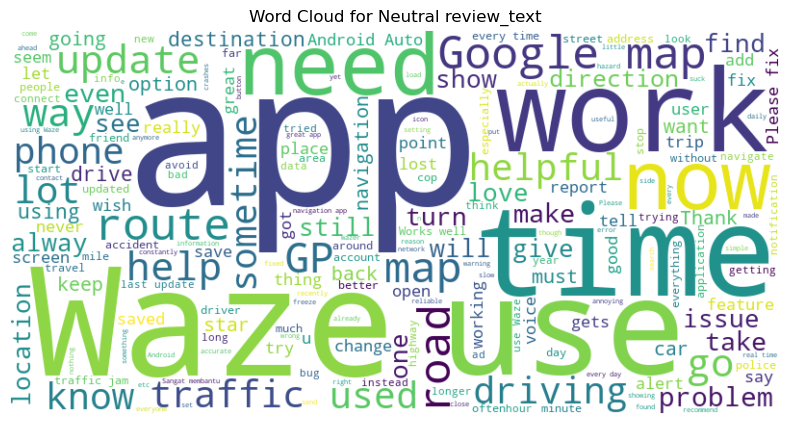

In [34]:
# lets take a look at the most used words in each positive, negative and neutral sentiment
from wordcloud import WordCloud

# Function to generate word cloud for each sentiment
def generate_word_cloud(sentiment):
    text = ' '.join(review for review in waze_clean[waze_clean['Sentiment'] == sentiment]['review_text'])
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} review_text')
    plt.axis('off')
    plt.show()

# Generating word clouds for each sentiment
for sentiment in ['Positive', 'Negative', 'Neutral']:
    generate_word_cloud(sentiment) 
    

### Lets now take a look at the app versions within the dataset and see if there are any interesting trends or patterns in relation to sentiments and ratings.

In [35]:
# How many app versions are there
waze_clean['author_app_version'].nunique()

324

In [36]:
# Lets take a look at the top 17 app versions
waze_clean['author_app_version'].value_counts().head(17)

3.9.4.0     28448
3.7.8.0     22882
3.8.1.0     22104
3.9.3.0     20633
3.7.7.0     19273
3.9.0.0     17042
3.7.2.0     16653
4.73.0.3    13578
3.9.9.0     13471
3.9.5.3     13303
3.9.5.4     12085
4.0.0.2     11552
3.9.6.0     11256
3.6.0.0     11188
3.7.3.0     11003
3.9.8.0     10610
4.7.0.1     10501
Name: author_app_version, dtype: int64

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #4: </h1>
<b>What app version has the most user reviews?<div>

App version 3.9.4.0 has the most user reviews than any other version at 28,448 (released <b>March 11, 2015<b>).

>note: The latest app version in the dataset is 4.99.1.1 which has 31 reviews and released on <b>November 16, 2023.<b> 

### Lets take a look at how the sentiments add up in both app versions and see how they compare.

In [37]:
# lets see all the user reviews from app version 3.9.4.0
top_reviews = waze_clean.loc[waze_clean['author_app_version']== '3.9.4.0'].copy()
top_reviews 

,review_text,review_rating,author_app_version,review_timestamp,review_year,Sentiment
233145,צריך להגדיר כפרים עויינים ליהודים. כמו עוטף יר...,3,3.9.4.0,2015-03-11 14:46:01,2015,Neutral
233146,"I really like using Waze, however I have one s...",4,3.9.4.0,2015-03-11 14:46:43,2015,Neutral
233147,"Cab driver, this rocks ,highly suggest this ap...",5,3.9.4.0,2015-03-11 14:48:26,2015,Positive
233148,Easy in use,4,3.9.4.0,2015-03-11 14:52:01,2015,Positive
233149,Love it,5,3.9.4.0,2015-03-11 14:55:58,2015,Positive
...,...,...,...,...,...,...
742281,Bottom line it sucks.. You have to spend to mu...,1,3.9.4.0,2021-09-22 03:59:07,2021,Neutral
755078,Works fine,5,3.9.4.0,2022-05-11 01:36:16,2022,Positive
755100,Telling me to obey the law and other safety th...,2,3.9.4.0,2022-05-11 14:20:21,2022,Negative
760440,Does not run well on my android device.,3,3.9.4.0,2022-08-23 20:37:34,2022,Neutral


In [38]:
# lets see all the user reviews from app version 4.99.1.1
latest_version = waze_clean[waze_clean['author_app_version']== '4.99.1.1'].copy()
latest_version

,review_text,review_rating,author_app_version,review_timestamp,review_year,Sentiment
780009,People complaining about the new ui but I actu...,5,4.99.1.1,2023-11-15 21:22:25,2023,Positive
780010,"The app always picks the longest route, re-rou...",1,4.99.1.1,2023-11-15 21:22:27,2023,Negative
780011,"Google app with no material you icon, too many...",1,4.99.1.1,2023-11-15 21:35:21,2023,Positive
780013,recently it cant find much or route you proper...,3,4.99.1.1,2023-11-15 22:03:14,2023,Neutral
780014,I would give this app zero stars if I could. I...,1,4.99.1.1,2023-11-15 22:17:13,2023,Neutral
780015,Expirienced issues with map view overlaped by ...,4,4.99.1.1,2023-11-15 22:30:56,2023,Neutral
780016,"no gps, showing your approximate location",1,4.99.1.1,2023-11-15 22:41:23,2023,Negative
780017,Great App. I'd like to see more options to con...,4,4.99.1.1,2023-11-15 22:42:00,2023,Positive
780018,Australian speaker please,4,4.99.1.1,2023-11-15 23:01:59,2023,Neutral
780021,Update today. Still can't see the name of the ...,5,4.99.1.1,2023-11-16 00:22:44,2023,Positive


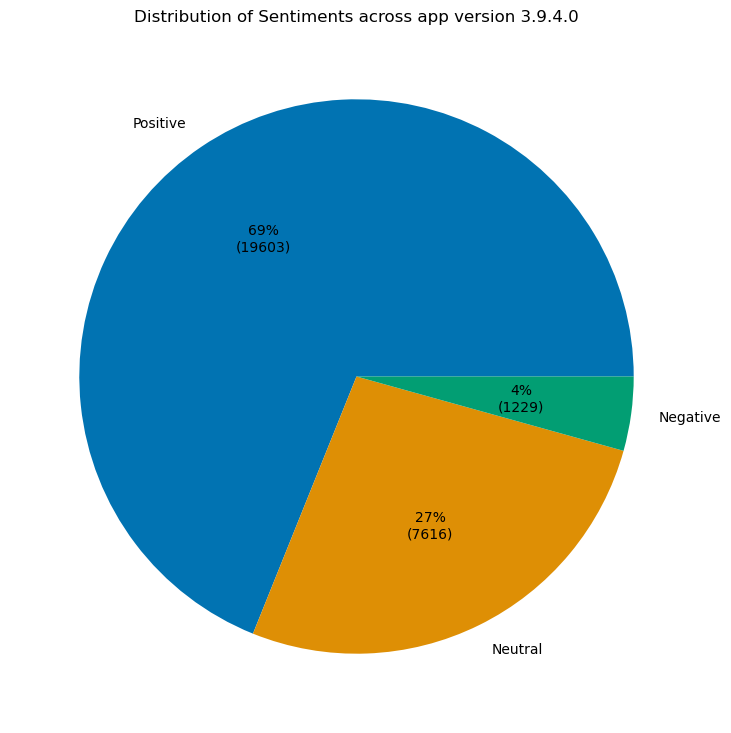

In [39]:
# lets now see the distribution of sentiments across app version 3.9.4.0
import matplotlib.pyplot as plt 
import seaborn

distribution = top_reviews['Sentiment'].value_counts()
values =  top_reviews['Sentiment']
numbers = distribution.index
quantity = distribution.values
total = len(values)

# Create a custom formatting function showing both % and numeric value
def my_fmt(x):
    return '{:.0f}%\n({:.0f})'.format(x, total * x / 100)

# define Seaborn color palette to use 
palette_color = seaborn.color_palette('colorblind') 
  
# plotting data on chart 
plt.figure(figsize=(9,9))
plt.pie(distribution, labels=numbers, colors=palette_color,autopct=my_fmt) 
plt.title('Distribution of Sentiments across app version 3.9.4.0')
  
# displaying chart 
plt.show() 

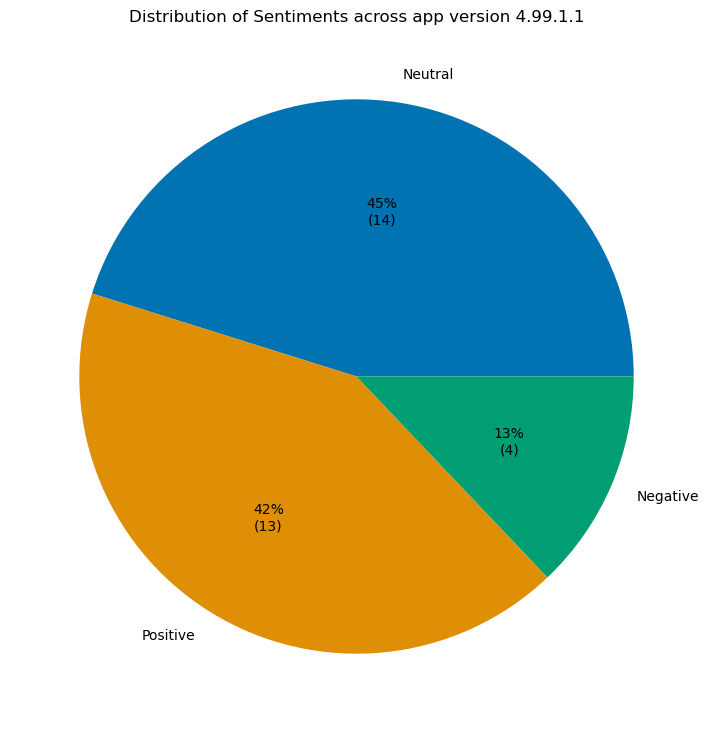

In [40]:
# lets now see the distribution of sentiments across app version 4.99.1.1
import matplotlib.pyplot as plt 
import seaborn

distribution = latest_version['Sentiment'].value_counts()
values =  latest_version['Sentiment']
numbers = distribution.index
quantity = distribution.values
total = len(values)

# Create a custom formatting function showing both % and numeric value
def my_fmt(x):
    return '{:.0f}%\n({:.0f})'.format(x, total * x / 100)

# define Seaborn color palette to use 
palette_color = seaborn.color_palette('colorblind') 
  
# plotting data on chart 
plt.figure(figsize=(9,9))
plt.pie(distribution, labels=numbers, colors=palette_color,autopct=my_fmt) 
plt.title('Distribution of Sentiments across app version 4.99.1.1')
  
# displaying chart 
plt.show() 

### As you can see, both app versions have a large percentage of positive sentiments overall; version 4.99.1.1 having neutral sentiment slightly higher by 1%. 

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #5: </h1>
<b>Are there any major differences in sentiments between app versions 3.9.4.0 and 4.99.1.1? If so, What are they?<div>

-  Both app versions have a large percentage of positive sentiments overall. Version 3.9.4.0 has a noticable lead, showing 69% of its user reviews being positive as opposed to version 4.99.1.1 showing only 42%.

In [41]:
# lets create a dataset for all the negative sentiments within entire dataset
waze_neg = waze_clean[ waze_clean['Sentiment']== "Negative"].copy()
waze_neg

,review_text,review_rating,author_app_version,review_timestamp,review_year,Sentiment
8,"It uses SD card for pictures, which makes it i...",3,0.99.2.3,2009-07-04 14:03:05,2009,Negative
13,This program cannot find any locations that i ...,2,0.99.2.3,2009-07-09 13:56:58,2009,Negative
18,"Good start,but maps are poor, app is very slow...",3,0.99.2.7,2009-07-10 15:02:24,2009,Negative
23,"Love the Idea, Just needs a lot Improvement (l...",3,0.99.2.7,2009-07-13 05:05:33,2009,Negative
27,Do not download will fill phone with hundreds ...,1,0.99.2.7,2009-07-19 17:40:47,2009,Negative
...,...,...,...,...,...,...
780032,Worst update ever. Everything stops working.,2,4.99.1.1,2023-11-16 05:08:24,2023,Negative
780037,Always Give wrong location,1,4.73.0.3,2023-11-16 07:01:38,2023,Negative
780052,The worst apps 👎,1,4.66.0.1,2023-11-16 16:57:41,2023,Negative
780061,Loses signal often,1,4.99.0.2,2023-11-16 21:14:34,2023,Negative


In [42]:
# lets see the distribution of negative reviews from app versions released from 2021 through 2023
waze_neg.groupby('author_app_version')['review_rating'].describe().sort_values(by='author_app_version',ascending=False).head(59)

,count,mean,std,min,25%,50%,75%,max
author_app_version,,,,,,,,
4.99.1.1,4.0,1.250000,0.500000,1.0,1.0,1.0,1.25,2.0
4.99.0.2,32.0,1.687500,1.119836,1.0,1.0,1.0,2.00,4.0
4.99.0.1,1.0,2.000000,NaN,2.0,2.0,2.0,2.00,2.0
4.98.0.1,320.0,1.640625,1.133242,1.0,1.0,1.0,2.00,5.0
4.98.0.0,8.0,2.000000,1.309307,1.0,1.0,1.5,2.50,4.0
4.97.0.0,133.0,1.864662,1.260002,1.0,1.0,1.0,2.00,5.0
4.96.90.903,1.0,3.000000,NaN,3.0,3.0,3.0,3.00,3.0
4.96.50.501,1.0,3.000000,NaN,3.0,3.0,3.0,3.00,3.0
4.96.1.0,141.0,1.843972,1.305394,1.0,1.0,1.0,2.00,5.0


The above report shows app version <b>4.73.0.3</b> ( released in 2021) through <b>4.99.1.1</b> ( released in 2023). 

As you can see, app versions released after <b>4.73.0.3</b> have a much smaller review count than <b>4.73.0.3</b>. 
    
This leads us to believe that there must have been a substantial amount of issues with this app version.  

In [43]:
# lets now revisit the top 17 author app versions and perform a comparison.
author_versions = ['3.9.4.0','3.7.8.0','3.8.1.0','3.9.3.0','3.7.7.0','3.9.0.0','3.7.2.0','4.73.0.3','3.9.9.0','3.9.5.3','3.9.5.4','4.0.0.2','3.9.6.0','3.6.0.0','3.7.3.0','3.9.8.0','4.7.0.1']
                

In [44]:
# lets save as a new dataset
many_versions = waze_clean[waze_clean['author_app_version'].isin(author_versions)].copy()
many_versions

,review_text,review_rating,author_app_version,review_timestamp,review_year,Sentiment
41475,verynice,5,3.6.0.0,2013-02-27 14:11:16,2013,Neutral
41477,A must have app.,5,3.6.0.0,2013-02-27 14:16:06,2013,Neutral
41479,Nice app..,4,3.6.0.0,2013-02-27 14:23:38,2013,Positive
41481,Sangat membantu... Keep up,5,3.6.0.0,2013-02-27 14:25:09,2013,Neutral
41482,What happened to the check-in button,2,3.6.0.0,2013-02-27 14:27:49,2013,Neutral
...,...,...,...,...,...,...
777733,Excellent,5,4.73.0.3,2023-10-04 23:26:09,2023,Positive
778531,The route keep changing,1,4.73.0.3,2023-10-20 06:33:54,2023,Neutral
779477,Extremely unuseful app.,1,3.8.1.0,2023-11-04 16:08:29,2023,Negative
779902,Love it!!,1,3.9.5.3,2023-11-13 12:35:55,2023,Positive


In [45]:
# lets create a dataset for all the negative sentiments within top 17 app versions
many_neg = many_versions[ many_versions['Sentiment']== "Negative"].copy()
many_neg

,review_text,review_rating,author_app_version,review_timestamp,review_year,Sentiment
41533,Status update not accurate Navigation out of t...,4,3.6.0.0,2013-02-27 17:10:44,2013,Negative
41540,"updated and now it crashes. ""failed to initiat...",5,3.6.0.0,2013-02-27 18:07:33,2013,Negative
41771,Navigator stopped working. Used this as a repl...,4,3.6.0.0,2013-02-28 07:32:23,2013,Negative
41955,I wish the points weren't so weighted towards ...,3,3.6.0.0,2013-02-28 18:12:45,2013,Negative
41960,Connecting GPS to a social network is a brilia...,5,3.6.0.0,2013-02-28 18:23:05,2013,Negative
...,...,...,...,...,...,...
769535,This navigation system is not accurate than Go...,1,3.9.0.0,2023-04-12 13:05:35,2023,Negative
770057,Useless without speed camera alerts. Cannot di...,2,4.73.0.3,2023-04-24 06:06:14,2023,Negative
775531,What Gives? I can no longer use MY voice on wa...,1,3.9.8.0,2023-08-16 19:38:27,2023,Negative
779477,Extremely unuseful app.,1,3.8.1.0,2023-11-04 16:08:29,2023,Negative


In [46]:
# lets take a look at all the app versions which have negtive sentiments
many_neg['author_app_version'].value_counts()

4.73.0.3    4254
3.9.4.0     1229
3.7.8.0      804
4.0.0.2      731
3.9.3.0      729
3.8.1.0      620
3.9.9.0      551
3.7.7.0      527
3.9.5.3      515
3.9.0.0      509
3.9.5.4      461
4.7.0.1      455
3.7.2.0      438
3.9.6.0      438
3.9.8.0      387
3.7.3.0      318
3.6.0.0      248
Name: author_app_version, dtype: int64

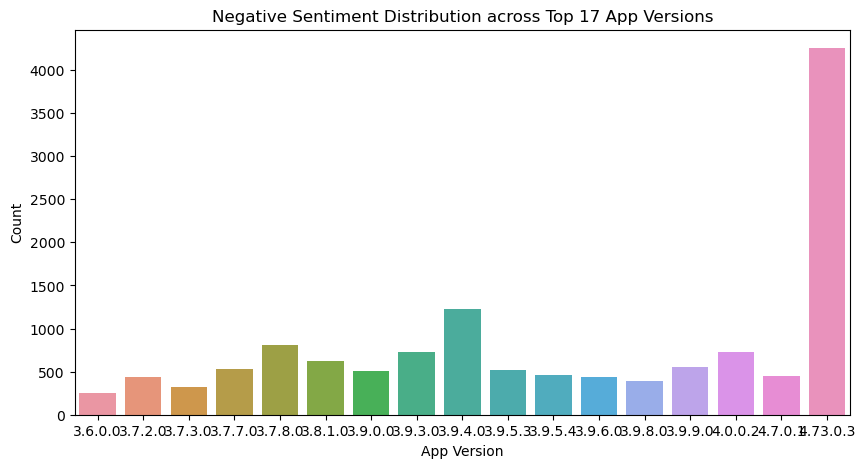

In [47]:
# lets take a look at the distribution of negative sentiments across top 17 app versions
plt.figure(figsize=(10, 5))
sns.countplot(data=many_neg, x='author_app_version')
plt.title('Negative Sentiment Distribution across Top 17 App Versions')
plt.xlabel('App Version')
plt.ylabel('Count')
plt.show()

### As you can see, app version 4.73.0.3 has the most negative user reviews than all versions in this group and  entire dataset.  

### The app version with the most positive reviews is 3.9.9.0. while 4.73.0.3 has the most negative reviews out of all app versions. 

In [48]:
# lets take a look at all the user reviews for app version 4.73.0.3
version_fourseventhree = waze_clean.loc[waze_clean['author_app_version']== '4.73.0.3'].copy()
version_fourseventhree 

,review_text,review_rating,author_app_version,review_timestamp,review_year,Sentiment
707339,Best app doesn't give wrong information.,5,4.73.0.3,2021-04-06 17:18:42,2021,Positive
707343,I don't what's happened seen last year doesn't...,1,4.73.0.3,2021-04-06 18:45:39,2021,Neutral
707348,Please work on adding all the roads and all th...,5,4.73.0.3,2021-04-06 19:10:53,2021,Positive
707349,"Very useful, but sometimes takes you via stran...",4,4.73.0.3,2021-04-06 19:10:59,2021,Positive
707351,"This is a really good app, I just wish I could...",4,4.73.0.3,2021-04-06 19:19:14,2021,Positive
...,...,...,...,...,...,...
775914,Nice,5,4.73.0.3,2023-08-25 16:36:05,2023,Positive
776198,Wonderful and marvellous p perfect and so easy...,5,4.73.0.3,2023-09-01 12:41:36,2023,Positive
777733,Excellent,5,4.73.0.3,2023-10-04 23:26:09,2023,Positive
778531,The route keep changing,1,4.73.0.3,2023-10-20 06:33:54,2023,Neutral


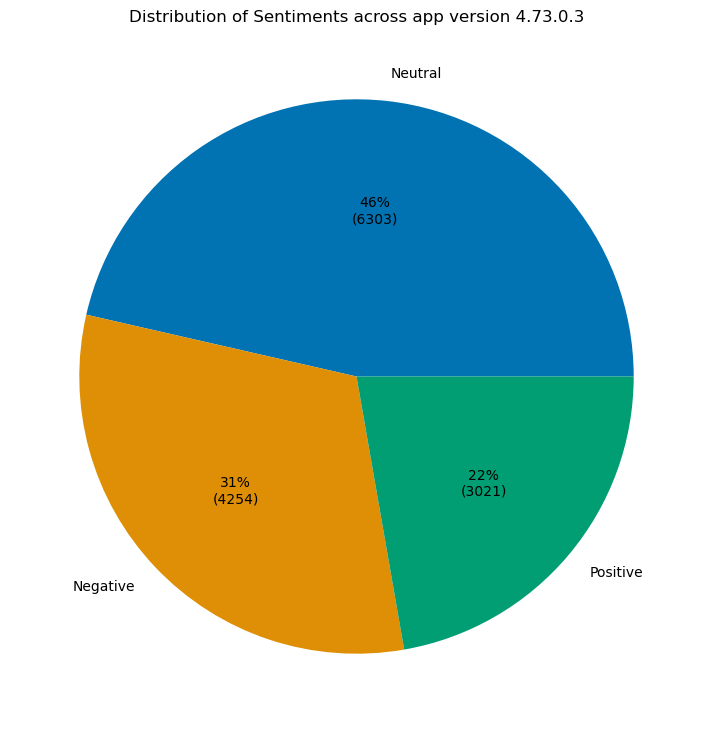

In [49]:
# lets now see the distribution of sentiments across app version 4.73.0.3
import matplotlib.pyplot as plt 
import seaborn

distribution = version_fourseventhree['Sentiment'].value_counts()
values =  version_fourseventhree['Sentiment']
numbers = distribution.index
quantity = distribution.values
total = len(values)

# Create a custom formatting function showing both % and numeric value
def my_fmt(x):
    return '{:.0f}%\n({:.0f})'.format(x, total * x / 100)

# define Seaborn color palette to use 
palette_color = seaborn.color_palette('colorblind') 
  
# plotting data on chart 
plt.figure(figsize=(9,9))
plt.pie(distribution, labels=numbers, colors=palette_color,autopct=my_fmt) 
plt.title('Distribution of Sentiments across app version 4.73.0.3')
  
# displaying chart 
plt.show() 

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #6: </h1>
<b>Based off the findings from the distribution of sentiments across Top 17 app versions chart, which version has the most reviews that are negatively ranked and how many are there?</b>
</div>

- Version 4.73.0.3 has the most reviews that are negatively ranked with a total of 4,254, which is 11% out of all negative sentiments.

### Lets now take a look at each of the years, how they relate to user review sentiments and ratings, also how they compare.

In [50]:
# lets see how many years are within this dataset
year_distribution = waze_clean['review_year'].value_counts().copy()
year_distribution

2016    118139
2017    109918
2015    105403
2014     94509
2013     74324
2021     41577
2019     34031
2020     27736
2012     27263
2018     25800
2022     15173
2023     12349
2011      4545
2010      1131
2009       240
Name: review_year, dtype: int64

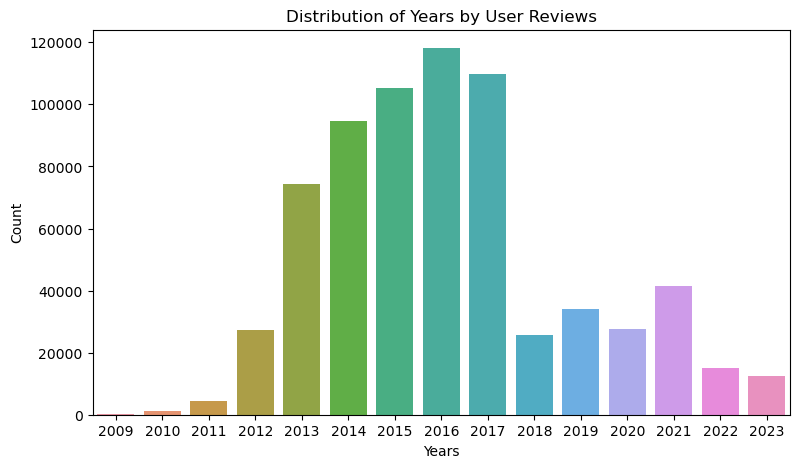

In [51]:
# lets now plot the distribution of years by user reviews
plt.figure(figsize=(9, 5))
sns.barplot(x=year_distribution.index, y=year_distribution.values)
plt.title('Distribution of Years by User Reviews')
plt.xlabel('Years')
plt.ylabel('Count')
plt.show()

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #7 </h1>
<b>Based off the findings from the distribution of years by user reviews chart, which year contains the most reviews and which has the least overall?</b>
</div>

- Year 2016 has a total of 118,139 reviews which equates to 17% of all reviews in a 15 year span.
- Year 2009 has a total of 240 reviews which equates to 4% of all reviews in a 15 year span.

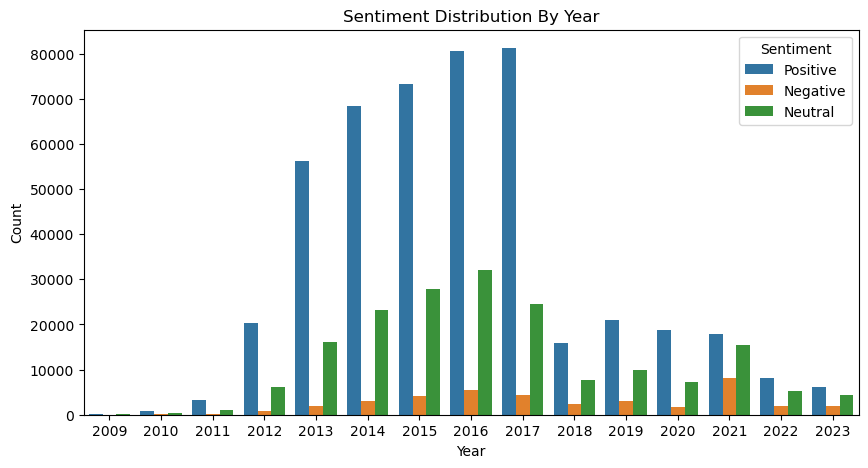

In [52]:
# lets take a look at the distribution of sentiments across the years
plt.figure(figsize=(10, 5))
sns.countplot(data=waze_clean, x='review_year', hue='Sentiment')
plt.title('Sentiment Distribution By Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

### As you can see from the sentiment distribution by year chart, the year with the most positive sentiments is 2017 while year 2021 has the most negative overall.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #8: </h1>
<b>Based off the findings from the sentiment distribution by year chart,how many negative reviews were placed in year 2021 and what is the percentage out of all negative sentiments?</b>
</div>

- For the year 2021, there was a total of 8,182 reviews placed which is 21% of all the negative sentiments.

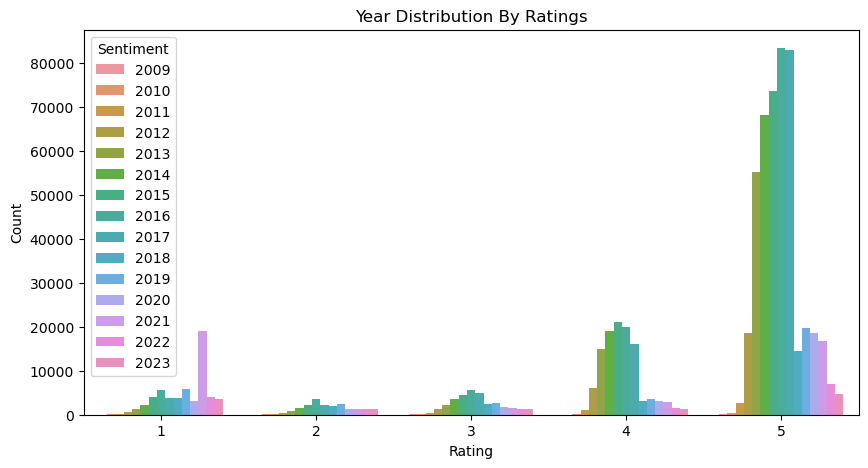

In [53]:
# Distribution of years across Ratings
plt.figure(figsize=(10, 5))
sns.countplot(data=waze_clean, x='review_rating', hue='review_year')
plt.title('Year Distribution By Ratings')
plt.xlabel('Rating')      
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

### We see that in rating number 1 most of the reviews are comprised from year 2021 than any other year.

### It would be good to know how the sentiments are broken up by number, and how many are from  app version 4.73.0.3.

In [54]:
# lets take a look at the year 2021 data
year_2021 = waze_clean[waze_clean['review_year']== 2021].copy()
year_2021

,review_text,review_rating,author_app_version,review_timestamp,review_year,Sentiment
697858,This app make a very ba decision if you dont k...,1,4.69.0.3,2021-01-01 00:33:51,2021,Negative
697860,I was looking for an alternative to Google so ...,2,4.69.0.3,2021-01-01 02:10:04,2021,Neutral
697861,So Good,5,4.67.0.4,2021-01-01 02:17:00,2021,Positive
697862,Where is Tamil language..,3,4.64.1.0,2021-01-01 03:10:34,2021,Neutral
697863,"I want to like it, i really do. But it's annoy...",3,4.69.0.3,2021-01-01 04:20:06,2021,Negative
...,...,...,...,...,...,...
747865,To complicated time consuming its not a well t...,2,4.79.0.2,2021-12-31 19:55:10,2021,Negative
747866,I wish they had other social media links,5,4.79.0.2,2021-12-31 20:12:52,2021,Neutral
747867,Basically unusable in landscape. Why do we nee...,1,4.79.0.2,2021-12-31 20:19:09,2021,Positive
747869,I love this app,5,4.79.0.2,2021-12-31 22:43:47,2021,Positive


In [55]:
# lets change index to reflect the sentiments
year_2021.set_index('Sentiment',inplace=True)

In [56]:
# lets now take a look at the dataset
year_2021

,review_text,review_rating,author_app_version,review_timestamp,review_year
Sentiment,,,,,
Negative,This app make a very ba decision if you dont k...,1,4.69.0.3,2021-01-01 00:33:51,2021
Neutral,I was looking for an alternative to Google so ...,2,4.69.0.3,2021-01-01 02:10:04,2021
Positive,So Good,5,4.67.0.4,2021-01-01 02:17:00,2021
Neutral,Where is Tamil language..,3,4.64.1.0,2021-01-01 03:10:34,2021
Negative,"I want to like it, i really do. But it's annoy...",3,4.69.0.3,2021-01-01 04:20:06,2021
...,...,...,...,...,...
Negative,To complicated time consuming its not a well t...,2,4.79.0.2,2021-12-31 19:55:10,2021
Neutral,I wish they had other social media links,5,4.79.0.2,2021-12-31 20:12:52,2021
Positive,Basically unusable in landscape. Why do we nee...,1,4.79.0.2,2021-12-31 20:19:09,2021


In [57]:
# lets take a look at all the app versions within the year 2021
year_2021['author_app_version'].value_counts()

4.73.0.3       13522
4.74.0.3        4150
4.70.1.0        3435
4.72.0.0        2949
4.71.0.2        2384
               ...  
3.7.3.1            1
4.65.4.900         1
4.61.80.800        1
3.2.0.0            1
4.68.4.901         1
Name: author_app_version, Length: 158, dtype: int64

In [58]:
# lets take a look at user reviews ranked number 1
waze_rone = waze_clean[ waze_clean['review_rating']== 1].copy()
waze_rone

,review_text,review_rating,author_app_version,review_timestamp,review_year,Sentiment
2,I was all excited about this app (ehat a great...,1,0.99.2.3,2009-06-30 17:08:33,2009,Positive
10,Can't find any address I input,1,0.99.2.3,2009-07-07 03:00:41,2009,Neutral
27,Do not download will fill phone with hundreds ...,1,0.99.2.7,2009-07-19 17:40:47,2009,Negative
57,Same issues as others. Sounds like a great app...,1,1.1.2,2009-08-14 19:37:05,2009,Positive
61,Cant do broad searches like (Gas station miami...,1,0.99.2.7,2009-08-25 02:50:45,2009,Negative
...,...,...,...,...,...,...
780052,The worst apps 👎,1,4.66.0.1,2023-11-16 16:57:41,2023,Negative
780059,Keeps reconnecting no help from Waze emails. A...,1,4.99.1.1,2023-11-16 21:08:41,2023,Neutral
780061,Loses signal often,1,4.99.0.2,2023-11-16 21:14:34,2023,Negative
780062,Update: car icon is gone in AA. Lose my place ...,1,4.99.1.1,2023-11-16 21:23:09,2023,Negative


In [59]:
# lets take a look at user reviews ranked in rating number 1 by year and sentiment
waze_rone.groupby(['review_year','Sentiment']).describe()

review_rating                                   
                              count mean  std  min  25%  50%  75%  max
review_year Sentiment                                                 
2009        Negative           13.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
            Neutral            21.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
            Positive            7.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
2010        Negative           49.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
            Neutral            94.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
            Positive           38.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
2011        Negative           73.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
            Neutral           107.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
            Positive           49.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
2012        Negative          166.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
            Neutral           356.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
            Positive          167.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
2013        Negative          274.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
            Neutral           641.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
            Positive          309.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
2014        Negative          538.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
            Neutral          1033.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
            Positive          620.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
2015        Negative          890.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
            Neutral          2230.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
            Positive          983.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
2016        Negative         1401.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
            Neutral          2885.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
            Positive         1409.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
2017        Negative         1035.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
            Neutral          1933.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
            Positive          869.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
2018        Negative         1051.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
            Neutral          1823.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
            Positive          892.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
2019        Negative         1727.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
            Neutral          2784.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
            Positive         1310.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
2020        Negative          853.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
            Neutral          1569.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
            Positive          743.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
2021        Negative         7326.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
            Neutral         10048.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
            Positive         1707.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
2022        Negative         1194.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
            Neutral          2017.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
            Positive          855.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
2023        Negative         1168.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
            Neutral          1656.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
            Positive          789.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0

In [60]:
# lets revisit user reviews categorized by negative sentiment
waze_neg

,review_text,review_rating,author_app_version,review_timestamp,review_year,Sentiment
8,"It uses SD card for pictures, which makes it i...",3,0.99.2.3,2009-07-04 14:03:05,2009,Negative
13,This program cannot find any locations that i ...,2,0.99.2.3,2009-07-09 13:56:58,2009,Negative
18,"Good start,but maps are poor, app is very slow...",3,0.99.2.7,2009-07-10 15:02:24,2009,Negative
23,"Love the Idea, Just needs a lot Improvement (l...",3,0.99.2.7,2009-07-13 05:05:33,2009,Negative
27,Do not download will fill phone with hundreds ...,1,0.99.2.7,2009-07-19 17:40:47,2009,Negative
...,...,...,...,...,...,...
780032,Worst update ever. Everything stops working.,2,4.99.1.1,2023-11-16 05:08:24,2023,Negative
780037,Always Give wrong location,1,4.73.0.3,2023-11-16 07:01:38,2023,Negative
780052,The worst apps 👎,1,4.66.0.1,2023-11-16 16:57:41,2023,Negative
780061,Loses signal often,1,4.99.0.2,2023-11-16 21:14:34,2023,Negative


In [61]:
# lets see what years have user reviews with negative sentiments
waze_neg['review_year'].value_counts()

2021    8182
2016    5451
2017    4296
2015    4154
2019    3029
2014    2948
2018    2306
2022    1889
2013    1880
2023    1828
2020    1723
2012     814
2011     203
2010     115
2009      33
Name: review_year, dtype: int64

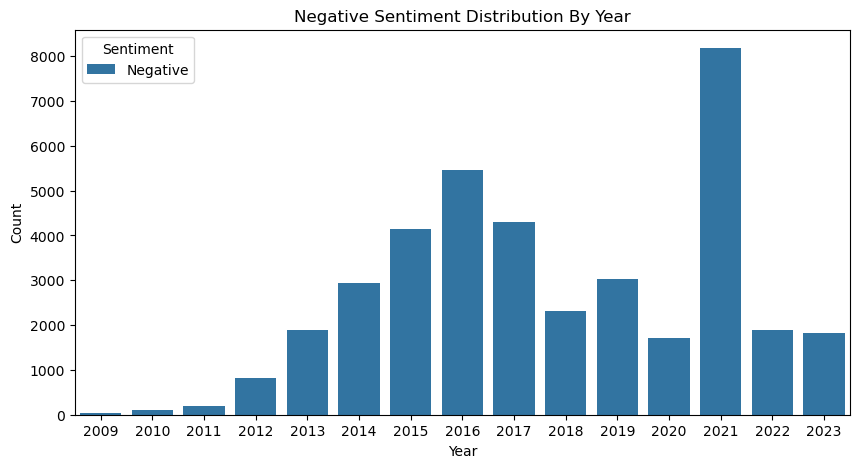

In [62]:
# lets take a look at the distribution of negative sentiments across the years
plt.figure(figsize=(10, 5))
sns.countplot(data=waze_neg, x='review_year', hue='Sentiment')
plt.title('Negative Sentiment Distribution By Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

In [63]:
# lets see all the negative sentiments within year 2021
neg = year_2021.loc[ 'Negative'] 
neg

,review_text,review_rating,author_app_version,review_timestamp,review_year
Sentiment,,,,,
Negative,This app make a very ba decision if you dont k...,1,4.69.0.3,2021-01-01 00:33:51,2021
Negative,"I want to like it, i really do. But it's annoy...",3,4.69.0.3,2021-01-01 04:20:06,2021
Negative,From port dickson heading to ioi city mall..wa...,1,4.69.0.3,2021-01-01 06:35:16,2021
Negative,"I use it when Google can't find a street, beca...",3,4.69.0.3,2021-01-02 15:16:02,2021
Negative,Sometimes it picks up the wrong State and send...,3,4.69.0.3,2021-01-02 18:36:24,2021
...,...,...,...,...,...
Negative,"Terrible app, it sent us to the hell",1,4.51.2.1,2021-12-30 17:01:41,2021
Negative,Horrible! Took me on a convoluted route throug...,1,4.79.0.2,2021-12-30 17:34:25,2021
Negative,"Used to work ""not so"" well. Now ""unable"" to wo...",1,4.78.0.2,2021-12-30 17:41:12,2021


In [64]:
# How many app versions were released in 2021 having negative reviews
neg['author_app_version'].nunique()

128

In [65]:
# lets see how many of these negative reviews are from app version 4.73.0.3
neg[neg['author_app_version']== '4.73.0.3']

,review_text,review_rating,author_app_version,review_timestamp,review_year
Sentiment,,,,,
Negative,Unable to get a proper ETA anywhere in the cit...,1,4.73.0.3,2021-04-07 02:35:58,2021
Negative,"Always had issues, always down",2,4.73.0.3,2021-04-07 16:40:55,2021
Negative,Lately waze is diverting off freeway until sid...,4,4.73.0.3,2021-04-07 22:36:26,2021
Negative,Not working anymore when open app in the morni...,1,4.73.0.3,2021-04-08 00:12:29,2021
Negative,All of a sudden one day I set a destination an...,1,4.73.0.3,2021-04-09 12:26:27,2021
...,...,...,...,...,...
Negative,Horrible GPS app I deliver medical equipment a...,1,4.73.0.3,2021-10-05 19:47:01,2021
Negative,Bad service,3,4.73.0.3,2021-10-24 05:57:23,2021
Negative,Not speaking in Persian. speaking very late .i...,3,4.73.0.3,2021-10-26 21:26:52,2021


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #9: </h1>
<b> Out of the 8,182 negative reviews placed in year 2021, how many are from app version 4.73.0.3?</b>

- Out of the 8,182 negative reviews in year 2021 approximatley 4,244 (52%) of them are from the author app version 4.73.0.3.

In [66]:
# This is the dataset for the negative sentiment within rating number 1
neg_rating1 = neg[neg['review_rating'] == 1].copy()
neg_rating1

,review_text,review_rating,author_app_version,review_timestamp,review_year
Sentiment,,,,,
Negative,This app make a very ba decision if you dont k...,1,4.69.0.3,2021-01-01 00:33:51,2021
Negative,From port dickson heading to ioi city mall..wa...,1,4.69.0.3,2021-01-01 06:35:16,2021
Negative,Sometimes this gives us wrong direction,1,4.69.0.3,2021-01-03 07:55:22,2021
Negative,No good,1,4.66.0.1,2021-01-03 15:33:09,2021
Negative,What's wrong with the app? Is there a issue wh...,1,4.69.0.3,2021-01-04 17:12:17,2021
...,...,...,...,...,...
Negative,Worst!,1,4.55.0.1,2021-12-30 08:42:02,2021
Negative,The worst navigation app ever made . **** It,1,4.79.0.2,2021-12-30 15:53:34,2021
Negative,"Terrible app, it sent us to the hell",1,4.51.2.1,2021-12-30 17:01:41,2021


In [67]:
# lets see how many of these negative reviews in rating number 1 are from the author app version 4.73.0.3
neg_rating1[neg_rating1['author_app_version']== '4.73.0.3']

,review_text,review_rating,author_app_version,review_timestamp,review_year
Sentiment,,,,,
Negative,Unable to get a proper ETA anywhere in the cit...,1,4.73.0.3,2021-04-07 02:35:58,2021
Negative,Not working anymore when open app in the morni...,1,4.73.0.3,2021-04-08 00:12:29,2021
Negative,All of a sudden one day I set a destination an...,1,4.73.0.3,2021-04-09 12:26:27,2021
Negative,Really bad responsiveness. Kept opening menus ...,1,4.73.0.3,2021-04-09 21:51:38,2021
Negative,very slow,1,4.73.0.3,2021-04-10 03:31:04,2021
...,...,...,...,...,...
Negative,I was in difficult situation and you guys came...,1,4.73.0.3,2021-08-31 16:27:28,2021
Negative,I was able to use the app with no problem. eve...,1,4.73.0.3,2021-09-02 18:58:52,2021
Negative,Horrible GPS app I deliver medical equipment a...,1,4.73.0.3,2021-10-05 19:47:01,2021


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #10: </h1>
<b> Out of the 7,326 negative reviews in rating number 1 for year 2021, how many are from app version 4.73.0.3</b>

- Out of the 7,326 negative reviews in rating number 1 for year 2021, approximatley 4,136 (56%) of them are from the author app version 4.73.0.3.

In [68]:
pos = year_2021.loc['Positive']
pos

,review_text,review_rating,author_app_version,review_timestamp,review_year
Sentiment,,,,,
Positive,So Good,5,4.67.0.4,2021-01-01 02:17:00,2021
Positive,Love it...accept when u have some kid about ha...,5,4.69.0.3,2021-01-01 05:38:17,2021
Positive,New update no sugestion?? Please make an updat...,3,4.69.0.3,2021-01-01 07:08:11,2021
Positive,Great,5,4.67.0.4,2021-01-01 07:22:13,2021
Positive,Amazing,5,4.69.0.3,2021-01-01 11:01:05,2021
...,...,...,...,...,...
Positive,"Best sat nav app, ever. Real time feedback on ...",5,4.79.0.2,2021-12-31 17:50:18,2021
Positive,It's awesome,5,4.79.0.2,2021-12-31 19:40:41,2021
Positive,Basically unusable in landscape. Why do we nee...,1,4.79.0.2,2021-12-31 20:19:09,2021


In [69]:
# This is the dataset for the positive sentiment within rating number 1
pos_rating1 = pos[pos['review_rating'] == 1]
pos_rating1

,review_text,review_rating,author_app_version,review_timestamp,review_year
Sentiment,,,,,
Positive,"Now, with mandatory car-pooling suppositories ...",1,4.69.0.3,2021-01-02 21:07:50,2021
Positive,good for travellers,1,4.68.2.0,2021-01-03 09:20:46,2021
Positive,ALWAYS APPROXIMATELY NO GPS! My GPS on and my ...,1,4.15.0.2,2021-01-06 16:35:18,2021
Positive,I have originally given 5 stars to Waze. But I...,1,4.69.0.3,2021-01-07 05:57:38,2021
Positive,Brilliant except that icons are too small.,1,4.69.0.3,2021-01-08 08:25:42,2021
...,...,...,...,...,...
Positive,Dilley-Dallies on moving onward from vehicle s...,1,4.72.0.0,2021-12-28 20:03:09,2021
Positive,SUPER NOOB,1,4.78.0.2,2021-12-29 08:06:54,2021
Positive,Initially this app was amazing!!! Now??? It no...,1,4.79.0.2,2021-12-29 22:32:14,2021


In [70]:
neu = year_2021.loc['Neutral']
neu

,review_text,review_rating,author_app_version,review_timestamp,review_year
Sentiment,,,,,
Neutral,I was looking for an alternative to Google so ...,2,4.69.0.3,2021-01-01 02:10:04,2021
Neutral,Where is Tamil language..,3,4.64.1.0,2021-01-01 03:10:34,2021
Neutral,Like,5,4.69.0.3,2021-01-01 06:02:04,2021
Neutral,Been using this app for months now but suddenl...,1,4.69.0.3,2021-01-01 07:58:45,2021
Neutral,This new version is less effective bcoz its ha...,1,4.69.0.3,2021-01-01 09:39:38,2021
...,...,...,...,...,...
Neutral,"Waze of gas,..",1,4.79.0.2,2021-12-31 11:13:00,2021
Neutral,Very disappointed. Until recently I would have...,3,4.79.0.2,2021-12-31 12:05:07,2021
Neutral,👍,5,4.79.0.2,2021-12-31 16:18:06,2021


In [71]:
# This is the dataset for the neutral sentiment within rating number 1
neu_rating1 = neu[neu['review_rating'] == 1]
neu_rating1

,review_text,review_rating,author_app_version,review_timestamp,review_year
Sentiment,,,,,
Neutral,Been using this app for months now but suddenl...,1,4.69.0.3,2021-01-01 07:58:45,2021
Neutral,This new version is less effective bcoz its ha...,1,4.69.0.3,2021-01-01 09:39:38,2021
Neutral,Not opening at all,1,4.69.0.3,2021-01-01 21:49:42,2021
Neutral,please check why my oneplus 7t pro cannot find...,1,4.69.0.3,2021-01-02 08:17:21,2021
Neutral,Fix the goddamn gps,1,4.69.0.3,2021-01-02 08:27:01,2021
...,...,...,...,...,...
Neutral,data 4g youtube can run very smooth but waze a...,1,4.79.0.2,2021-12-30 09:54:15,2021
Neutral,This app should be 'undevelop'.,1,4.79.0.2,2021-12-30 15:29:39,2021
Neutral,"For years Waze was my ""go to"" app when traveli...",1,4.79.0.2,2021-12-30 21:03:02,2021


In [72]:
# lets combine all three datasets so that we can visualize the distribution of sentiments in rating number 1 for 2021
negsentiment_rating1 = pd.concat([neg_rating1, pos_rating1, neu_rating1]).copy()
negsentiment_rating1

,review_text,review_rating,author_app_version,review_timestamp,review_year
Sentiment,,,,,
Negative,This app make a very ba decision if you dont k...,1,4.69.0.3,2021-01-01 00:33:51,2021
Negative,From port dickson heading to ioi city mall..wa...,1,4.69.0.3,2021-01-01 06:35:16,2021
Negative,Sometimes this gives us wrong direction,1,4.69.0.3,2021-01-03 07:55:22,2021
Negative,No good,1,4.66.0.1,2021-01-03 15:33:09,2021
Negative,What's wrong with the app? Is there a issue wh...,1,4.69.0.3,2021-01-04 17:12:17,2021
...,...,...,...,...,...
Neutral,data 4g youtube can run very smooth but waze a...,1,4.79.0.2,2021-12-30 09:54:15,2021
Neutral,This app should be 'undevelop'.,1,4.79.0.2,2021-12-30 15:29:39,2021
Neutral,"For years Waze was my ""go to"" app when traveli...",1,4.79.0.2,2021-12-30 21:03:02,2021


In [73]:
# lets reset the index so that the Sentiments can be a column
negsentiment_rating1.reset_index(inplace=True)

In [74]:
# lets take a look at the dataset
negsentiment_rating1

,Sentiment,review_text,review_rating,author_app_version,review_timestamp,review_year
0,Negative,This app make a very ba decision if you dont k...,1,4.69.0.3,2021-01-01 00:33:51,2021
1,Negative,From port dickson heading to ioi city mall..wa...,1,4.69.0.3,2021-01-01 06:35:16,2021
2,Negative,Sometimes this gives us wrong direction,1,4.69.0.3,2021-01-03 07:55:22,2021
3,Negative,No good,1,4.66.0.1,2021-01-03 15:33:09,2021
4,Negative,What's wrong with the app? Is there a issue wh...,1,4.69.0.3,2021-01-04 17:12:17,2021
...,...,...,...,...,...,...
19076,Neutral,data 4g youtube can run very smooth but waze a...,1,4.79.0.2,2021-12-30 09:54:15,2021
19077,Neutral,This app should be 'undevelop'.,1,4.79.0.2,2021-12-30 15:29:39,2021
19078,Neutral,"For years Waze was my ""go to"" app when traveli...",1,4.79.0.2,2021-12-30 21:03:02,2021
19079,Neutral,Wow. This app will take you in a zig zag or a ...,1,4.79.0.2,2021-12-31 04:05:37,2021


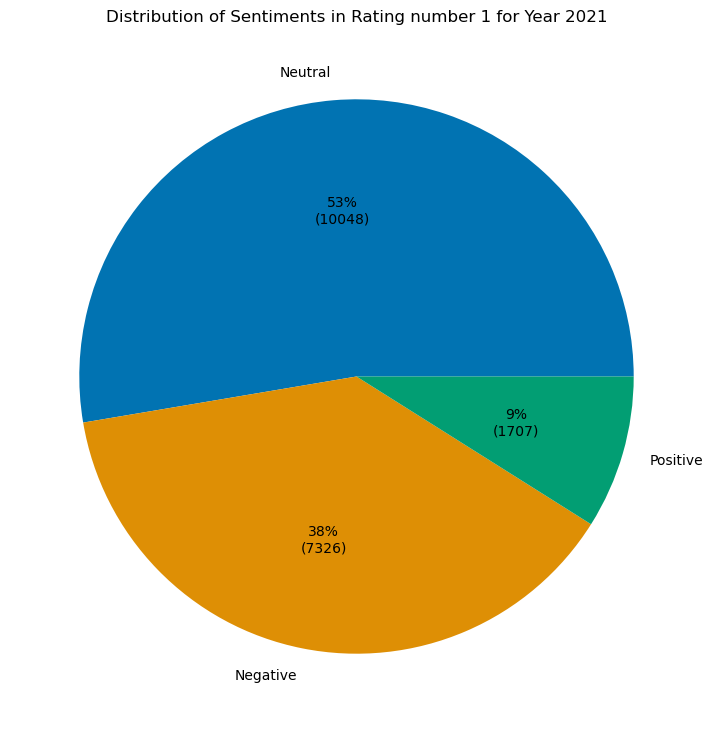

In [75]:
# lets now see the distribution of sentiments in rating number 1 for 2021
import matplotlib.pyplot as plt 
import seaborn

distribution = negsentiment_rating1['Sentiment'].value_counts()
values = negsentiment_rating1['Sentiment']
numbers = distribution.index
quantity = distribution.values
total = len(values)

# Create a custom formatting function showing both % and numeric value
def my_fmt(x):
    return '{:.0f}%\n({:.0f})'.format(x, total * x / 100)

# define Seaborn color palette to use 
palette_color = seaborn.color_palette('colorblind') 
  
# plotting data on chart 
plt.figure(figsize=(9,9))
plt.pie(distribution, labels=numbers, colors=palette_color,autopct=my_fmt) 
plt.title('Distribution of Sentiments in Rating number 1 for Year 2021')
  
# displaying chart 
plt.show() 


### We can now see the distribution of sentiments for the year 2021 in rating number 1. 

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #11: </h1>
<b> Based off the findings from the year distribution by ratings chart, We see that in rating number 1 there is a large percent of reviews from year 2021 than any other year.</b>
    
<b>How many user reviews make up the positive, negative and neutral sentiments?</b>
</div>

- For positive sentiments the total number is 1,707 which equates to 9% for 2021.
- For negative sentiments the total number is 7,326 which equates to 38% for 2021.
- For neutral sentiments the total number is 10,048 which equates to 53% for 2021.

In [76]:
# lets revisit how many user reviews come from those who use auth app version 4.73.0.3, and then take a look at the distribution of sentiments
version_fourseventhree

,review_text,review_rating,author_app_version,review_timestamp,review_year,Sentiment
707339,Best app doesn't give wrong information.,5,4.73.0.3,2021-04-06 17:18:42,2021,Positive
707343,I don't what's happened seen last year doesn't...,1,4.73.0.3,2021-04-06 18:45:39,2021,Neutral
707348,Please work on adding all the roads and all th...,5,4.73.0.3,2021-04-06 19:10:53,2021,Positive
707349,"Very useful, but sometimes takes you via stran...",4,4.73.0.3,2021-04-06 19:10:59,2021,Positive
707351,"This is a really good app, I just wish I could...",4,4.73.0.3,2021-04-06 19:19:14,2021,Positive
...,...,...,...,...,...,...
775914,Nice,5,4.73.0.3,2023-08-25 16:36:05,2023,Positive
776198,Wonderful and marvellous p perfect and so easy...,5,4.73.0.3,2023-09-01 12:41:36,2023,Positive
777733,Excellent,5,4.73.0.3,2023-10-04 23:26:09,2023,Positive
778531,The route keep changing,1,4.73.0.3,2023-10-20 06:33:54,2023,Neutral


In [77]:
# lets now see the years inwhich the user reviews were made from author app version 4.73.0.3
version_fourseventhree.groupby(['review_year','Sentiment']).describe()

review_rating                                           \
                              count      mean       std  min  25%  50%   75%   
review_year Sentiment                                                          
2021        Negative         4244.0  1.063148  0.434511  1.0  1.0  1.0  1.00   
            Neutral          6282.0  1.369946  1.098279  1.0  1.0  1.0  1.00   
            Positive         2996.0  3.819092  1.710807  1.0  2.0  5.0  5.00   
2022        Negative            7.0  1.285714  0.755929  1.0  1.0  1.0  1.00   
            Neutral            17.0  2.647059  2.029199  1.0  1.0  1.0  5.00   
            Positive           19.0  4.473684  1.306753  1.0  5.0  5.0  5.00   
2023        Negative            3.0  1.333333  0.577350  1.0  1.0  1.0  1.50   
            Neutral             4.0  1.250000  0.500000  1.0  1.0  1.0  1.25   
            Positive            6.0  3.666667  2.065591  1.0  2.0  5.0  5.00   

                            
                       max  
review_year Sentiment       
2021        Negative   5.0  
            Neutral    5.0  
            Positive   5.0  
2022        Negative   3.0  
            Neutral    5.0  
            Positive   5.0  
2023        Negative   2.0  
            Neutral    2.0  
            Positive   5.0

In [78]:
# lets also see the years inwhich the user reviews were made from author app version 4.73.0.3 by ratings
version_fourseventhree.groupby(['review_year','Sentiment','review_rating']).describe()

review_text         \
                                          count unique   
review_year Sentiment review_rating                      
2021        Negative  1                    4136   2059   
                      2                      31     31   
                      3                      26     26   
                      4                      19     19   
                      5                      32     32   
            Neutral   1                    5583   3618   
                      2                      65     65   
                      3                      83     83   
                      4                     111    110   
                      5                     440    417   
            Positive  1                     747    639   
                      2                      49     47   
                      3                      74     74   
                      4                     255    241   
                      5                    1871   1282   
2022        Negative  1                       6      6   
                      3                       1      1   
            Neutral   1                      10     10   
                      5                       7      7   
            Positive  1                       2      2   
                      3                       1      1   
                      5                      16     15   
2023        Negative  1                       2      2   
                      2                       1      1   
            Neutral   1                       3      3   
                      2                       1      1   
            Positive  1                       2      2   
                      5                       4      4   

                                                                                        \
                                                                                   top   
review_year Sentiment review_rating                                                      
2021        Negative  1                                                            Bad   
                      2                                 Always had issues, always down   
                      3              Whatever new algorithm that us being used to c...   
                      4              Lately waze is diverting off freeway until sid...   
                      5              We are in desperate need of a SPEED CAMERA ale...   
            Neutral   1                                                          Koyak   
                      2              Nowadays the map never show shortest distance,...   
                      3              I would give it more stars if they would have ...   
                      4                                                              👍   
                      5                                                       Excelent   
            Positive  1                                                           Good   
                      2                                                             Ok   
                      3              It wae ok but what happened to the cookie mons...   
                      4                                                           Good   
                      5                                                           Good   
2022        Negative  1              Worst app ever in navigation it just ruin my d...   
                      3              Disappointed. Too complicated to send report o...   
            Neutral   1                                     All roads are not visible.   
                      5                               Waze will never disappointe you!   
            Positive  1              Waze use to be really good but lately it has b...   
                      3                             Really need to improve the quality   
                      5                                                      